In [1]:
from netCDF4 import Dataset
import netCDF4 as netcdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl

#mapping
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import xarray as xr
import xarray.ufuncs as xu

In [2]:
aggr_url = "./data/CMEMS-global-analysis-forecast-phy-001-024-hourly-u-v.nc" #why did this location not work?
 

In [3]:
data = xr.open_dataset(aggr_url)

In [4]:
for variable in data.variables:
    print(variable,data.variables[variable].shape)


depth (1,)
latitude (37,)
vo (744, 1, 37, 37)
uo (744, 1, 37, 37)
time (744,)
longitude (37,)


In [5]:
lat=data.variables['latitude'][:]
lon=data.variables['longitude'][:]
time=data.variables['time'][:]

Select the first time.

In [6]:
u=np.squeeze(data.variables['uo'][0,:,:,:])
v=np.squeeze(data.variables['vo'][0,:,:,:])
t = time.values[0]


In [7]:
CurrMag=np.sqrt(u**2+v**2)

In [8]:
x, y = np.meshgrid(lon,lat)

In [9]:
# mask data
m = np.ma.masked_invalid(CurrMag)
u_m = np.ma.masked_invalid(u)
v_m = np.ma.masked_invalid(v)

In [10]:
print(x.shape)
print(y.shape)
print(u.shape)
print(v.shape)
print(m.shape)

(37, 37)
(37, 37)
(37, 37)
(37, 37)
(37, 37)


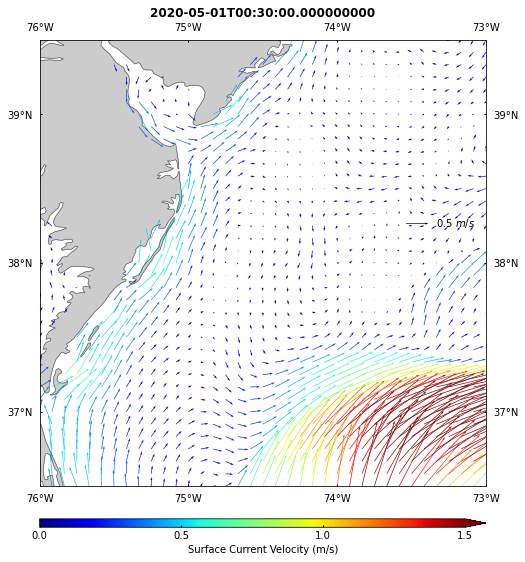

In [11]:
fig = plt.figure(figsize=(8,12))
proj = ccrs.PlateCarree()
ax=fig.add_subplot(1,1,1,projection=proj)
ax.set_extent([-76, -73, 36.5, 39.5])

#mpl.rcParams['font.family'] = 'Times New Roman'

ax.xaxis.set_major_formatter(LongitudeFormatter())
ax.yaxis.set_major_formatter(LatitudeFormatter())

lon_ticks = [-76, -75, -74, -73]
lat_ticks = [37, 38, 39]

ax.set_xticks(lon_ticks, crs=ccrs.PlateCarree())
ax.set_yticks(lat_ticks, crs=ccrs.PlateCarree())

ax.xaxis.set_tick_params(which='major', size=2., width=1, direction='in', top='on', pad=7)
ax.yaxis.set_tick_params(which='major', size=2., width=1, direction='in', right='on',pad=7)

ax.tick_params(labelleft=True,labelbottom=True,labeltop=True,labelright=True)  


ax.add_feature(cfeature.LAND.with_scale('10m'), color='grey', alpha=0.4)

ax.coastlines(resolution='10m',linewidth=0.3)

bounds = np.array([0.,0.5,1.,1.5])
norm = mpl.colors.Normalize(vmin=0., vmax=1.5)

cf=ax.quiver(x,y,u,v,m,cmap=plt.cm.jet,scale=10,width=.0015,norm=norm)

qk = ax.quiverkey(cf, 0.8, 0.58, 0.5, label='$0.5 \ m/s$', labelpos='E',
                   coordinates='figure')


cax,kw = mpl.colorbar.make_axes(ax,location='bottom',pad=0.05,aspect=50)

out=fig.colorbar(cf,cax=cax,ticks=bounds,extend='max',**kw)
out.set_label('Surface Current Velocity (m/s)',size=10)
out.ax.tick_params(direction='in',size=2., width=1)

ax.set_title(t, loc='center',fontdict=dict(size=12, weight='bold'))

plt.savefig('hf_radar_alt.png', dpi=300, transparent=False, bbox_inches='tight')
